In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print('data has {} rows, and {} columns'.format (df.shape[0],df.shape[1]))

data has 768 rows, and 9 columns


**Exercice 1**
*Question 1.1*

* Faire une sélection des données pour lesquelles le glucose est supérieur à 90, puis en
* Sélectionner uniquement les colonnes: Outcome, BMI, and Age, puis en
* Sélectionner uniquement les 8 premières lignes.

In [4]:
Glucose = df[df['Glucose']> 90]
Glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
Glucose[['Outcome', 'BMI', 'Age']].head(8)

,Outcome,BMI,Age
0,1,33.6,50
2,1,23.3,32
4,1,43.1,33
5,0,25.6,30
7,0,35.3,29
8,1,30.5,53
9,1,0.0,54
10,0,37.6,30


**Question 1.2**
* Faire une sélection des enregistrements où le glucose est entre 90 et 130, puis en
* Sélectionner uniquement les colonnes: Outcome, BMI, and Age, puis en
* Sélectionner uniquement les 6 premières lignes.

In [6]:
Glucose_90_130= df[(df['Glucose'] > 90) & (df['Glucose'] < 130)]
Glucose_90_130[['Outcome', 'BMI', 'Age']].head(6)

,Outcome,BMI,Age
5,0,25.6,30
7,0,35.3,29
9,1,0.0,54
10,0,37.6,30
15,1,30.0,32
16,1,45.8,31


**Question 1.3**
* Sélectionner les données qui ont Outcome = 1 et Pregnancies>0, puis
* Se restreindre aux seules colonnes Glucose et BloodPressure, puis
* Se restreindre aux 3 premieres lignes du dataframe résultant.

In [7]:
df1= df [(df['Outcome']==1) & (df['Pregnancies']> 0)]
df1[['Glucose','BloodPressure']].head(3)

,Glucose,BloodPressure
0,148,72
2,183,64
6,78,50


**Question 1.4**
* Dans ce jeux de données, combien de personnes présentant un diabète ont une tension artérielle supérieur à 70 ?

In [8]:
df1[df1['BloodPressure'] > 70]['Outcome'].count()

142

**Savoir si notre jeux de données possède des champs vides (non renseignés) ?**

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Afficher la liste des colonnes**

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Afficher le type de données des colonnes**

In [11]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Avoir un résumé statistique de notre Dataframe**

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


****Combien y a-t-il de diagnostics ?

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

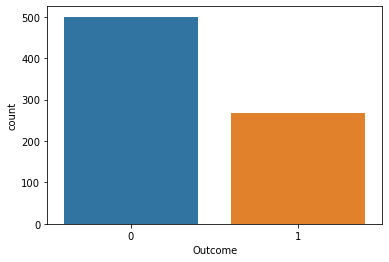

In [14]:
#visualisation Target
sns.countplot(df['Outcome'])

**Quelle est la moyenne de l'épaisseur de la peau des patientes dont le diagnostic est le diabète ?**

In [15]:
df[df['Outcome']==1].SkinThickness.mean()

22.16417910447761

**Question 1.5
* Quel est le maximum du "BMI" lorsque la patiente n'est pas atteinte par le diabète ?**

In [16]:
df[df['Outcome']==0].BMI.max()

57.3

**Étape 2 : Visualisation des données**

Analyse visuelle par des diagrammes de dispersion

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

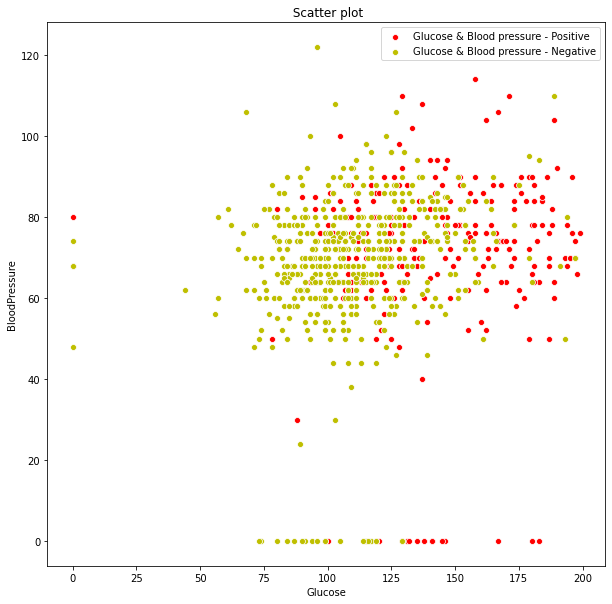

In [18]:
# plot Glucose vs BloodPressure and color points according to Outcome
plt.figure(figsize=(10,10))
sns.scatterplot(df[df['Outcome']==1].Glucose, df[df['Outcome']==1].BloodPressure, color='r',label='Glucose & Blood pressure - Positive' )
sns.scatterplot(df[df['Outcome']==0].Glucose, df[df['Outcome']==0].BloodPressure, color='y',label='Glucose & Blood pressure - Negative' )
plt.title(' Scatter plot')
plt.legend()


In [19]:
max([ len (c) for c in df.columns ] )

24

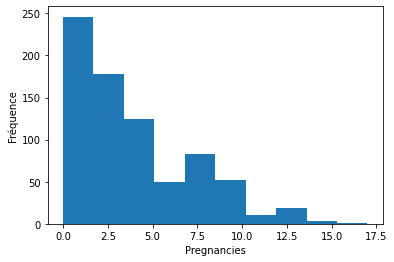

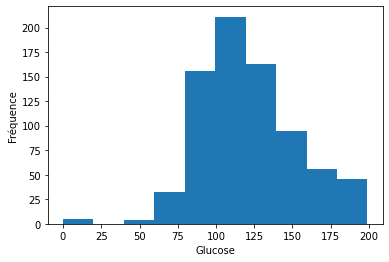

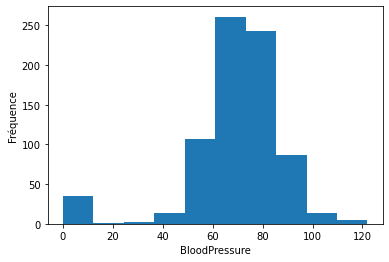

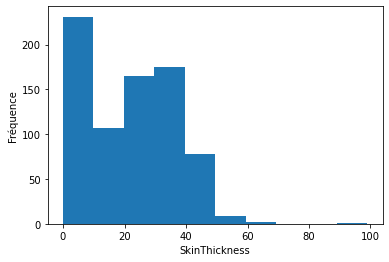

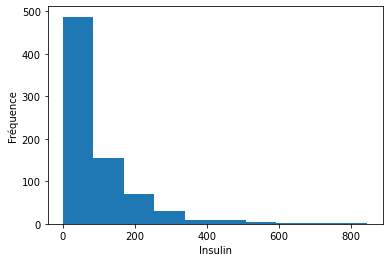

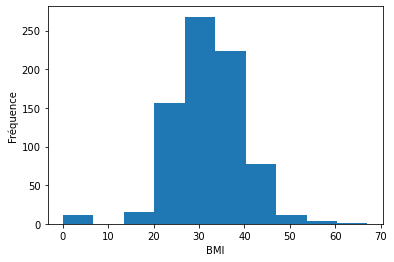

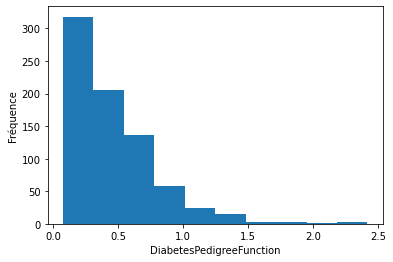

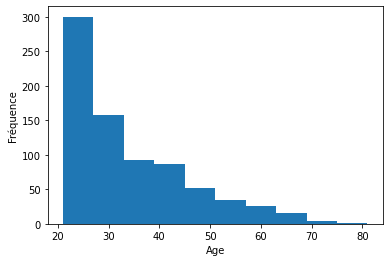

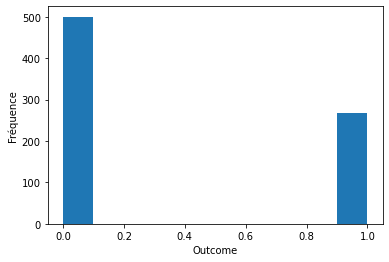

In [20]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel ('Fréquence')

**show value 0 in column**

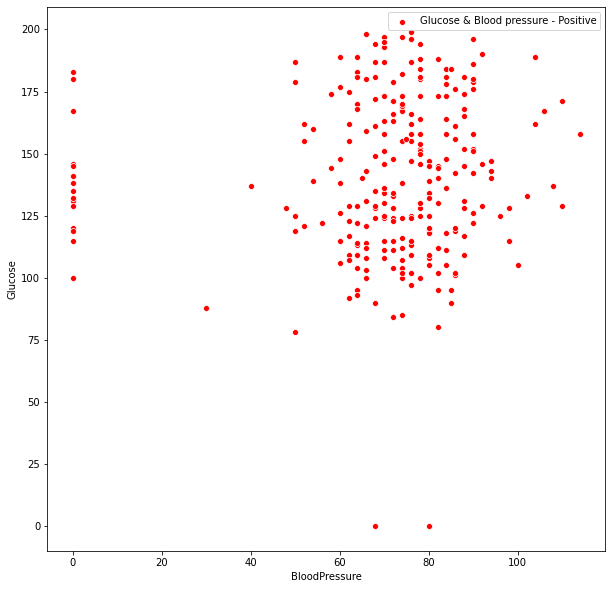

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(df[df['Outcome']==1].BloodPressure, df[df['Outcome']==1].Glucose, color='r',label='Glucose & Blood pressure - Positive' )

Text(0, 0.5, 'Frequence')

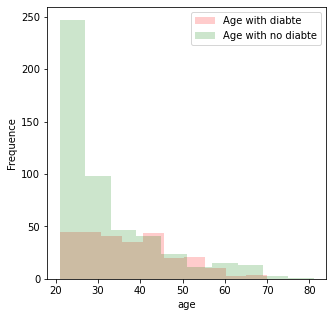

In [22]:
#Exemple 2 : superposition des histogrammes de l'Age en fonction du diabète
plt.figure(figsize=(5,5))
plt.hist(df[df['Outcome']==1].Age,color='r',label='Age with diabte',alpha=0.2 )
plt.hist(df[df['Outcome']==0].Age,color='green',label='Age with no diabte',alpha=0.2) 
plt.legend()
plt.xlabel('age')
plt.ylabel('Frequence')

In [23]:
#taux des personnes plus de 30 a diabte
len(df[(df.Age>30) & (df.Outcome ==1)])/df.shape[0]

0.23177083333333334

In [24]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Étape 3 :**
* La préparation des données pour le traitement se divise en 2 sous-étapes :

* Correction de l'ensemble initial ;
* Nous avons remarqué que le colonne Insuline était insuffisamment renseignée et nous allons la retirer
* Certaines valeurs à 0 doivent(/peuvent) être remplacées par la moyenne
* Division de l'ensemble de données en un ensemble d'entrainement et un ensemble de test (TRAIN/TEST)

In [25]:
df2 =df
df2.drop('Insulin', axis=1, inplace=True)

    


In [26]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [27]:
df2= df2.replace({0: np.nan})
df2.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
df2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age']]=df2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age']].fillna(df.mean())
df2['Outcome']=df2['Outcome'].fillna(0)
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,33.6,0.627,50.0,1.0
1,1.000000,85.0,66.0,29.000000,26.6,0.351,31.0,0.0
2,8.000000,183.0,64.0,20.536458,23.3,0.672,32.0,1.0
3,1.000000,89.0,66.0,23.000000,28.1,0.167,21.0,0.0
4,3.845052,137.0,40.0,35.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,32.9,0.171,63.0,0.0
764,2.000000,122.0,70.0,27.000000,36.8,0.340,27.0,0.0
765,5.000000,121.0,72.0,23.000000,26.2,0.245,30.0,0.0
766,1.000000,126.0,60.0,20.536458,30.1,0.349,47.0,1.0


**correlation with value 0**

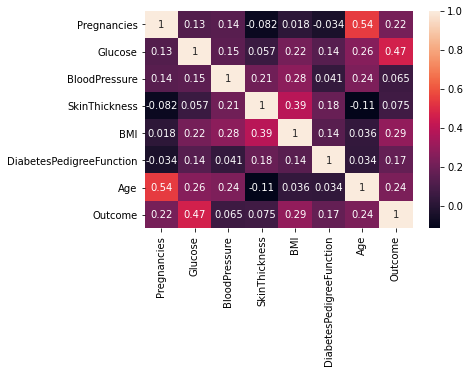

In [29]:
sns.heatmap(df.corr(), annot=True)

****correlation with no value 0****

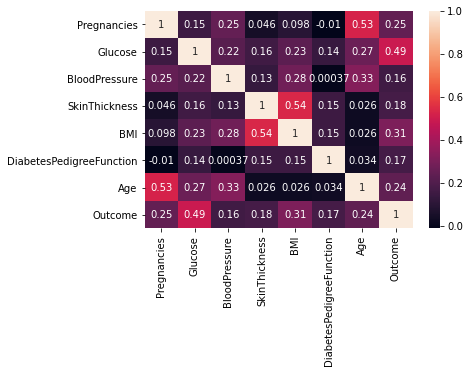

In [30]:
sns.heatmap(df2.corr(), annot=True)

**Visualisation univariate high relation**

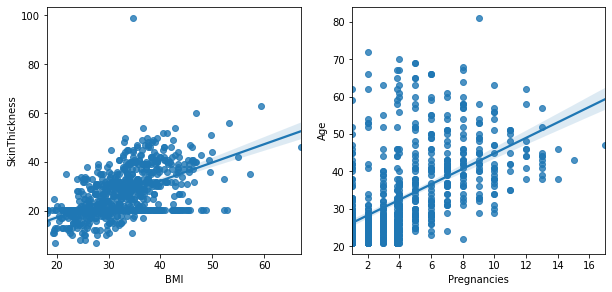

In [31]:
fig = plt.figure(figsize=(10,10))
# create subplot 
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# add plot in ax
sns.regplot(df2.BMI,df2.SkinThickness, ax = ax1)
sns.regplot(df2.Pregnancies,df2.Age, ax=ax2)


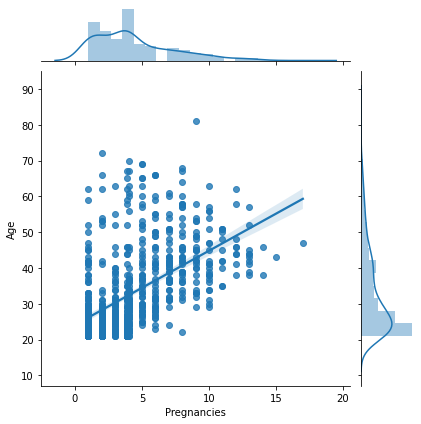

In [32]:
sns.jointplot(df2.Pregnancies,df2.Age, kind='reg')

In [33]:
Glucose = pd.pivot_table(data=df2,index=['Outcome'],values=['Glucose'])
Glucose

,Glucose
Outcome,
0.0,110.705367
1.0,142.159661


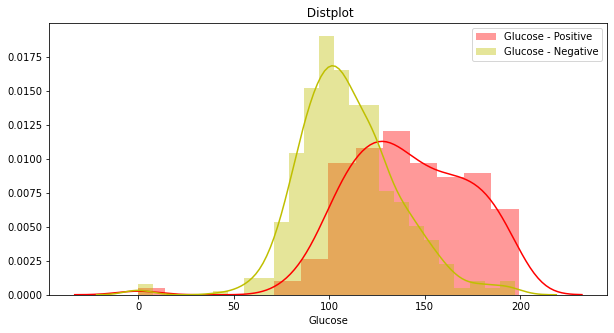

In [34]:
# plot Glucose according to Outcome
plt.figure(figsize=(10,5))
sns.distplot(df[df['Outcome']==1].Glucose, color='r',label='Glucose - Positive' )
sns.distplot(df[df['Outcome']==0].Glucose, color='y',label='Glucose - Negative' )
plt.title(' Distplot')
plt.legend()

In [35]:
Skin = pd.pivot_table(data=df2,index=['Outcome'],values=['SkinThickness'])
Skin

,SkinThickness
Outcome,
0.0,25.373135
1.0,28.907494


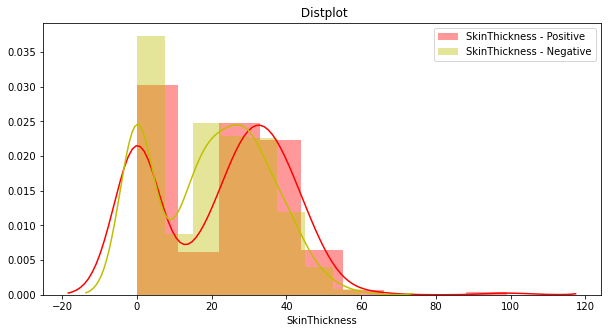

In [36]:


# # plot SkinThickness according to Outcome
plt.figure(figsize=(10,5))
sns.distplot(df[df['Outcome']==1].SkinThickness, color='r',label='SkinThickness - Positive' )
sns.distplot(df[df['Outcome']==0].SkinThickness, color='y',label='SkinThickness - Negative' )
plt.title(' Distplot')
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

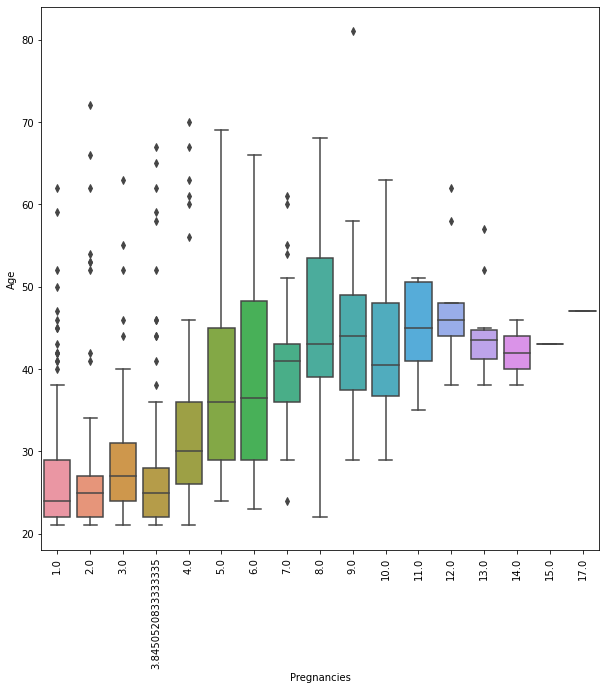

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(df2.Pregnancies,df2.Age)
plt.xticks(rotation=90)

**Création des sous-ensemble d'entrainement et de test**

In [38]:
import sklearn
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size = 0.3, random_state = 0) 
print (train.shape)
print (test.shape)

(537, 8)
(231, 8)


In [39]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [40]:
X_train= train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age']]
X_test= test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age']]
Y_train = train['Outcome']
Y_test = test['Outcome']


# ****La classification avec les arbres de decision****

In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=17)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=17)

In [42]:
from sklearn.metrics import accuracy_score
tree_pred = clf.predict(X_test)
print(accuracy_score(Y_test, tree_pred))

0.7835497835497836


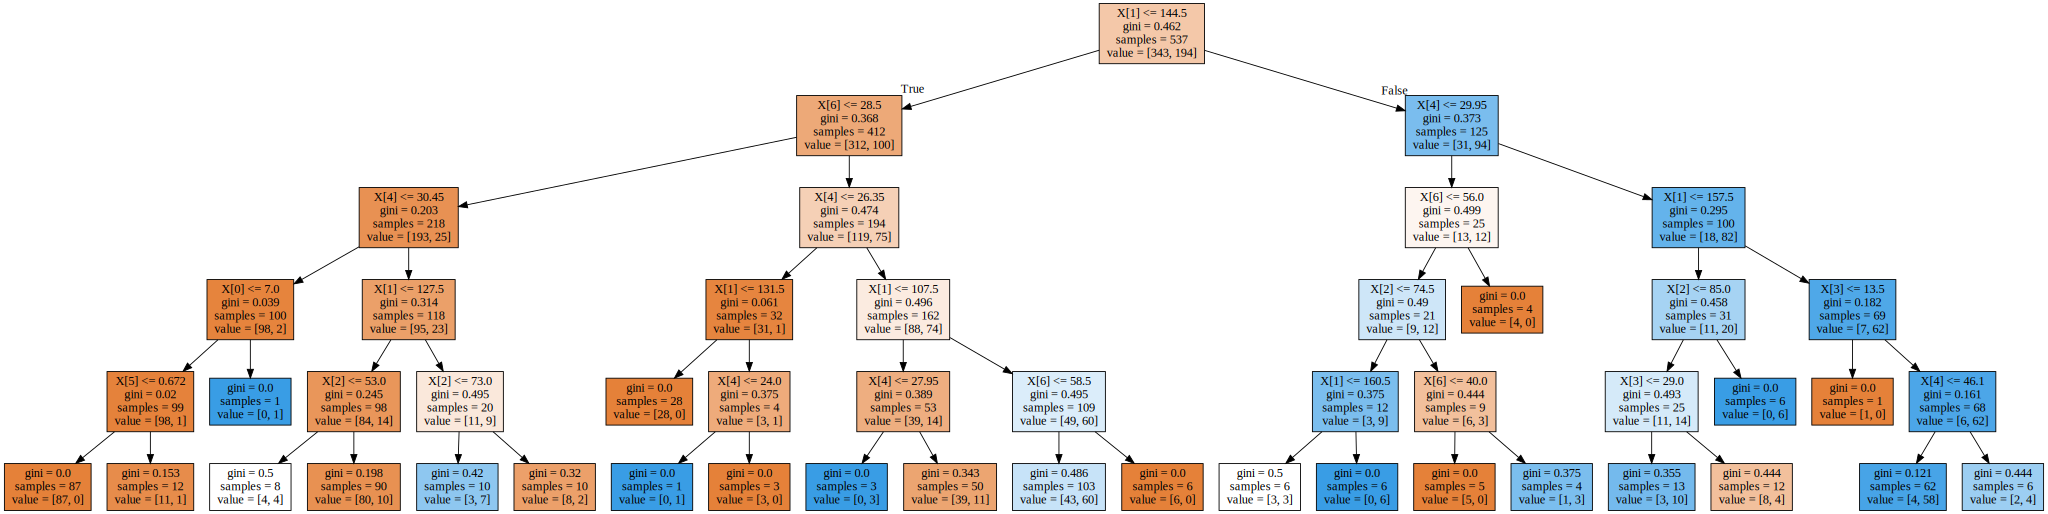

In [43]:
import graphviz
resultat_visuel = tree.export_graphviz(clf, out_file=None,filled=True)
graph = graphviz.Source(resultat_visuel)
graph

# **Classification with KNN**

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [45]:
knn_pred = knn.predict(X_test)
print(accuracy_score(Y_test, knn_pred))

0.7532467532467533


**Amelioration hyperparametre**

In [46]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(clf, tree_params,
cv=5, n_jobs=-1,
verbose=True)

tree_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    3.9s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [47]:
print(tree_grid.best_params_) 
print(tree_grid.best_score_) 
print(accuracy_score(Y_test, tree_grid.predict(X_test)))

{'max_depth': 5, 'max_features': 7}
0.7299238490827276
0.7835497835497836


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1, verbose=True)
knn_grid.fit(X_train, Y_train)
print(knn_grid.best_params_, knn_grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.3s remaining:    0.2s


{'knn__n_neighbors': 7} 0.7430425752855659


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.5s finished


In [49]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print(np.mean(cross_val_score(forest, X_train, Y_train, cv=5)))

forest_params = {'max_depth': range(1, 11), 'max_features': range(4, 19)}

forest_grid = GridSearchCV(forest, forest_params,
                           cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, Y_train)

print(forest_grid.best_params_, forest_grid.best_score_) 

0.7448598130841122
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   56.9s finished


{'max_depth': 3, 'max_features': 4} 0.7652994115610938


In [50]:
print('random forest score :', forest_grid.best_score_) 
print ('KNN score :', knn_grid.best_score_)
print('arbre des decisions score:', accuracy_score(Y_test, tree_grid.predict(X_test)))


random forest score : 0.7652994115610938
KNN score : 0.7430425752855659
arbre des decisions score: 0.7835497835497836
